In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV


import pickle



In [9]:
! pwd

/mnt/c/Ironhack


In [10]:
df = pd.read_csv('./mis_proyectos/cobify/data/data_clean.csv')

df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0


In [11]:
gas_type_diccionario = {'E10':0, 'SP98':1}
df['gas_type'] = df['gas_type'].map(gas_type_diccionario) 


In [12]:
df.drop('temp_inside',axis=1, inplace=True)
df.drop('temp_outside',axis=1, inplace=True)

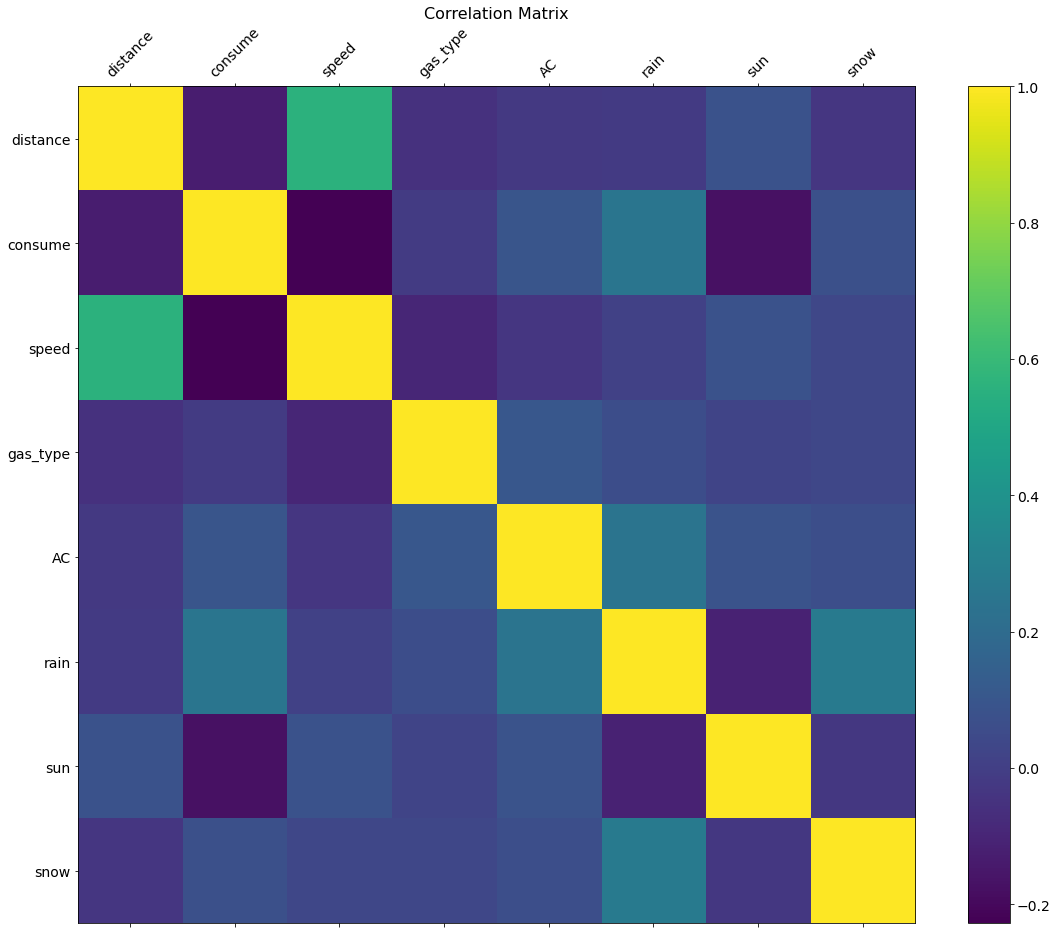

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.astype(float).corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [14]:
y=df.consume
X=df.drop('consume',axis=1)

In [15]:
y

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387    5.0
Name: consume, Length: 388, dtype: float64

In [16]:
X

,distance,speed,gas_type,AC,rain,sun,snow
0,28.0,26,0,0.0,0.0,0.0,0
1,12.0,30,0,0.0,0.0,0.0,0
2,11.2,38,0,0.0,0.0,0.0,0
3,12.9,36,0,0.0,0.0,0.0,0
4,18.5,46,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
383,16.0,39,1,0.0,0.0,0.0,0
384,16.1,38,1,1.0,0.0,0.0,0
385,16.0,45,1,0.0,0.0,0.0,0
386,15.4,42,1,1.0,0.0,0.0,0


In [17]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.2, random_state=27)

# Evaluador de modelos

In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('====================')
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("MAE: ", metrics.mean_absolute_error(test_labels, predictions))
    print("MSE: ", metrics.mean_squared_error(test_labels,predictions))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_labels,predictions)))
    print("R2: ", metrics.r2_score(test_labels,predictions))
    return  metrics.mean_squared_error(test_labels,predictions)

# Random Forest Random Search 

## Generar Modelo

In [11]:
rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs = 1)


## Entrenar Modelo

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.565 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.534 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.611 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.439 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.003 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.548 total time=   1.7s
[CV 2/5] END boot

[CV 4/5] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.361 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.086 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.513 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.532 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.497 total time=   0.7s
[CV 4/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.362 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.531 total time=   1.3s
[CV 3/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.505 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.358 total time=   1.2s
[CV 5/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=-0.207 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=0.446 total time=   1.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=0.496 total time=   1.0s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_sampl

[CV 5/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.143 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.505 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.527 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.495 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.346 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-0.220 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.497 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.075 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.457 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.499 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.635 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.494 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf

[CV 2/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=0.551 total time=   0.8s
[CV 3/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=0.415 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=0.125 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=-0.457 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.540 total time=   1.2s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.524 total time=   1.2s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, 

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200;, score=-0.583 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.547 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.512 total time=   1.4s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.639 total time=   1.2s


In [ ]:
rf_random.best_estimator_

## Evaluar Modelo

In [ ]:
y_predict=rf_random.predict(X_test)

random_forest=y_predict,evaluate(rf_random, X_test, y_true)



A pesar de que parece una variable importante vamos a retirar la temp exterior



# Gradient boost

In [ ]:
gbr = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )

In [ ]:
gbr.fit(X_train, y_train)

## Predicción

In [ ]:
y_predict = gbr.predict(X = X_test)

## Evaluación

In [ ]:
gradient_boost=y_predict,evaluate(gbr, X_test, y_true)


# Gradient boost HIPER PARÁMETROS

## Buscamos el profundidad del arbol evitando overfittind

In [ ]:

train_scores = []
cv_scores    = []

estimator_range = range(1, 500, 25)

for n_estimators in estimator_range:
    
    modelo = GradientBoostingRegressor(
                n_estimators = n_estimators,
                loss         = 'ls',
                max_features = 'auto',
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = metrics.mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = True
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = -1,
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [ ]:

param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

gbr = GradientBoostingRegressor(n_estimators = 101, validation_fraction = 0.1, n_iter_no_change = 5, tol= 0.0001)
grid = GridSearchCV(
        estimator  = gbr,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = 5, 
        refit      = True,
        verbose    = 3,
       )


In [ ]:
gbr.fit(X_train, y_train)

## Predicción

In [ ]:
y_predict = gbr.predict(X = X_test)

## Evaluación

In [ ]:
gradient_boost_hp=y_predict,evaluate(gbr, X_test, y_true)


# Regresión Lineal

## Entrenamos modelo

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)


## Predecimos

In [25]:
y_predict=lr.predict(X_test)

In [26]:
linear_regresion=y_predict,evaluate(lr, X_test, y_true)


Model Performance
Accuracy = 86.68%.
MAE:  0.6143914840181389
MSE:  0.6097944907783932
RMSE:  0.7808933927101658
R2:  -0.020865807200493025


# Evaluciaon media

In [ ]:
y_predict_media=pd.DataFrame([gradient_boost_hp[0],gradient_boost[0],random_forest[0]], linear_regresion[0]).mean())

In [ ]:
y_predict_media

In [ ]:

errors = abs(y_predict_media - y_true)
mape = 100 * np.mean(errors / y_true)
accuracy = 100 - mape
print('====================')
print('Model Performance')
print('Accuracy = {:0.2f}%.'.format(accuracy))
print("MAE: ", metrics.mean_absolute_error(y_true, y_predict_media))
print("MSE: ", metrics.mean_squared_error(y_true,y_predict_media))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_true,y_predict_media)))
print("R2: ", metrics.r2_score(y_true,y_predict_media))


In [ ]:
with open('../modelos/rf_random.pickle'+'-MSE:'+ str(round(metrics.mean_squared_error(y_true,y_predict_media),3)), 'wb') as archivo:
    pickle.dump(rf_random, archivo)